3
0 0
2 3
4 1

Region # 1 :
(0.0, 0.0)-(2.0, 3.0)-(4.0, 1.0)-(0.0, 0.0)
Perimeter Length =  10.56


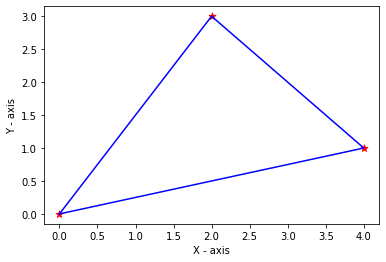

0


In [1]:
import math
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def Left_most_index(points) :
    minimum = 0
    for i in range(1,len(points)):
        if points[i].x < points[minimum].x:
            minimum = i
        elif ((points[i].x == points[minimum].x) and (points[i].y < points[minimum].y)):
          minimum = i
    return minimum


def orientation(point1, point2, point3):
    slope = point1.x * (point2.y - point3.y) + point2.x * (point3.y - point1.y) + point3.x * (point1.y - point2.y)
    if slope == 0:
        return 0        
    elif slope > 0:
        return 1        
    else:
        return 2         


def convexHull(points, n):    
    if n < 3:
        return   
    l = Left_most_index(points) 
    hull = []
    point1 = l
    point2 = 0
    while(True):
        hull.append(point1)
        point2 = (point1 + 1) % n 
        for i in range(n):
            if(orientation(points[point1],
                           points[i], points[point2]) == 2):
                point2 = i
        point1 = point2

        if(point1 == l):
          break

    extreme_points = []
    ls = []
    for each in hull:
        extreme_points.append([points[each].x, points[each].y])
    ls.append(extreme_points[0])
    extreme_points.extend(ls)
    return extreme_points     


def perimeter_length(list_points):
  perimeter = 0
  for i in range(0,len(list_points)):
    p1 = list_points[i]
    if i == len(list_points) - 1:
      break
    else:
      p2 = list_points[i+1]
    perimeter += math.sqrt(((p2[0] - p1[0])**2) + ((p2[1] - p1[1])**2))
  return '{:.2f}'.format(perimeter,2)


def Plotting(x,y,list_graph):
  plt.scatter(x,y, label= "stars", color = "red",marker = "*",s = 50)
  plt.xlabel("X - axis")
  plt.ylabel("Y - axis")
  list_x = []
  list_y = []
  list_plot = [item for sublist in list_graph for item in sublist]
  list_x = (list_plot[::2])
  list_y = (list_plot[1::2])
  plt.plot(list_x,list_y,color = "blue",)
  plt.show()


def Take_input(no):
  point_list = []
  x_coordinates = []
  y_coordinates = []
  for i in range(no):
    x, y = [float(i) for i in input().split()]
    y_coordinates.append(y)
    x_coordinates.append(x)
    point_list.append(Point(x,y))

  perimeter_list = convexHull((point_list), len(point_list))
  return perimeter_list,x_coordinates,y_coordinates



def Printing_output(final_list):
  list_tuple = []
  for i in (tuple(ele) for ele in tuple(final_list)):
    list_tuple.append(i)
  tuple_form = tuple(list_tuple)
  s = [str(i) for i in tuple_form]
  print("-".join(s))








n = 1
count = 1
while(n!= 0):
  for count in range(1,10000):
    n = int(input())
    if(n==0):
      break
    out,x_points,y_points = Take_input(n)
    print()
    print("Region #",count,":")
    Printing_output(out)
    print("Perimeter Length = ",perimeter_length(out))
    Plotting(x_points,y_points,out)